# Changes in attachement time

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tangle import Tangle, node_graph, watcher, analyser
from PC_classes import mal_node

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

### PC Tangle CLength = 10 rate = 3 attach time = 20

In [3]:
for trial in range(1,101):
    ### Instantiating all the classes   ###
    t = Tangle(rate=3, tip_selection='mcmc', plot=True)
    ng = node_graph(t)
    w = watcher(t, ng, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng.new_node()
    ng.new_node(mal=True, watch=w)


    ### Running the simulation  ###
    attachment_flag = False

    while t.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t.time += dt_time
        if (t.time > 20) and (attachment_flag == False):
            ng.nodes[-1].issue_bad_transaction()
            PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
            w.PC_add_time = t.time
            w.update()
            ng.nodes[-1].spam_transactions(10)
            badNode = ng.nodes[-1]
            print(badNode.chain)
            attachment_flag = True
        else:
            ng.nodes[node].issue_transaction()
            w.update()
            print(t.time)

    w.output_to_sheet()



First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001A10649F2F0>]
Edges []
Node IDS [0]
Weights [[0, 1242, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001A10649F2F0>, <tangle.node object at 0x000001A1082C5910>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 1242, 1], [1, 1336, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001A10649F2F0>, <tangle.node object at 0x000001A1082C5910>, <tangle.node object at 0x000001A107FA5160>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 1242, 1], [1, 1336, 1], [2, 1028, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001A10649F2F0>, <tangle.node object at 0x000001A1082C5910>, <tangle.node object at 0x000001A107FA5160>, <tangle.node object at 0x000001A166E93E60>]
Edges [(1, 0), (2, 0), (2, 1), (3, 1), (3, 2)]
Node IDS [0, 1, 2, 3]
Weights [[0, 1242, 1], [1, 1336, 1], [2, 1028, 1], [3, 769, 1]]
Finish

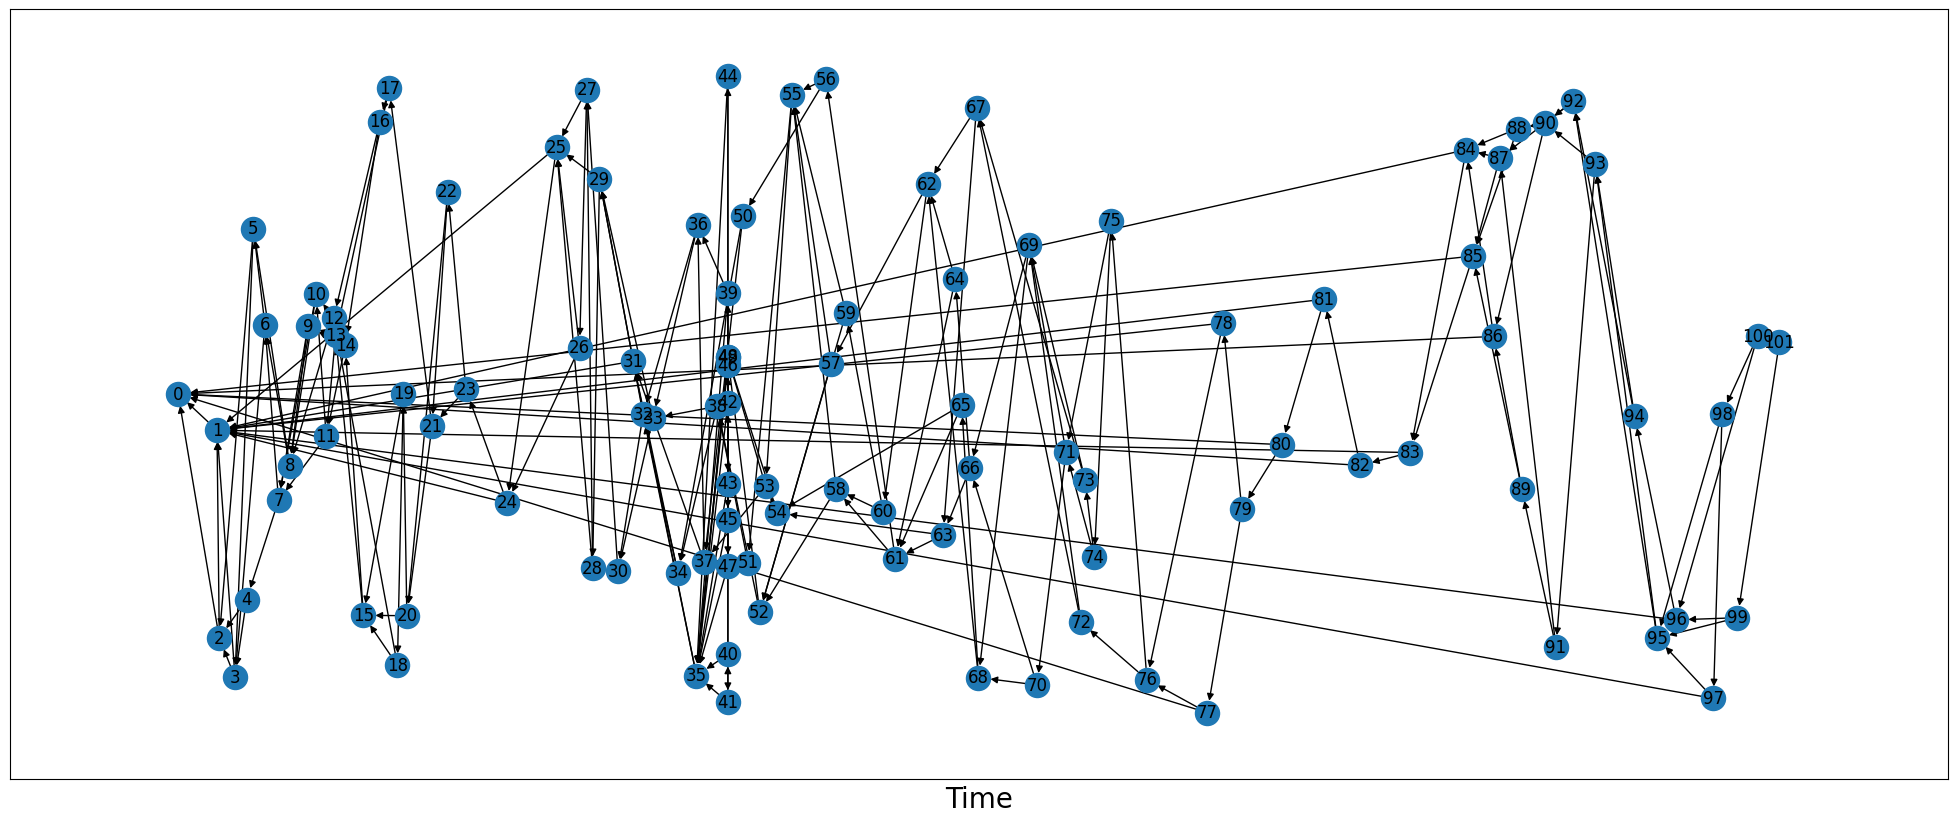

In [4]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.figure(figsize=(25, 10))
t.plot()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 4, 4, 4, 5, 7, 9, 9, 10, 12, 12, 13, 17, 19, 19, 19, 20, 20, 23, 25, 25, 26, 28, 28, 28, 28, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 32, 42, 42, 42, 44, 45, 45, 47, 48, 51, 51, 53, 53, 53, 53, 53, 54, 54, 56, 58, 60, 60, 60, 65, 66, 67, 69, 70, 71, 74, 75, 75, 77, 78, 78, 80, 81, 81, 82, 83, 83, 84, 85, 86, 86, 88, 91, 91, 91, 92, 92] [1.0, 1.4710173194124976, 1.5572395902578982, 2.152640598607478, 2.590238857227463, 2.8490821979490786, 3.2847136209594137, 3.79961524721529, 4.224142312389866, 4.911257231250799, 5.221447308300383, 5.602995997837415, 5.884329219488719, 5.959173472684203, 6.325881767259569, 7.009157743333747, 7.628991060879086, 7.987162126402539, 8.29750641553996, 8.519712594736362, 8.65432977190176, 9.60646346564654, 10.204749505668483, 10.892760859746438, 12.451512353408141, 14.318126279710025, 15.190236048167487, 15.465258315602219, 15.68482811108322, 15.943971348566334, 16.641635978269715, 17.218773568562195, 17.5952

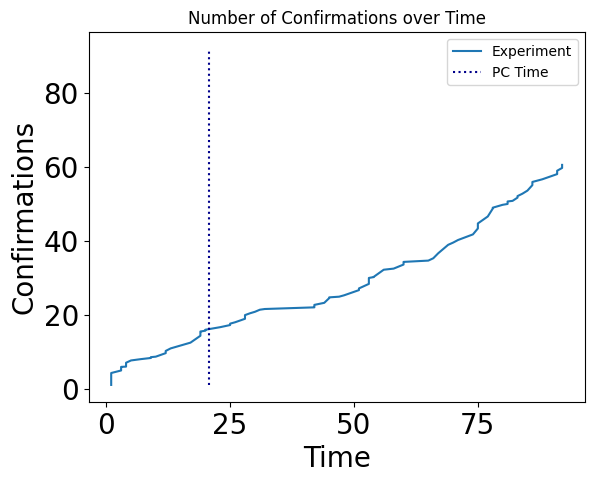

In [5]:
w.plot_confirm_over_time()
print(w.PC_add_time)

In [6]:
a = analyser()
results = a.get_res(100)

[[1, 1.0, 141], [2, 1.0, 144], [3, 1.0, 151], [4, 1.0077519379844961, 129], [5, 1.2281879194630871, 149], [6, 1.7, 150], [7, 2.3622047244094486, 127], [8, 3.3087248322147653, 149], [9, 4.726708074534161, 161], [10, 6.423357664233577, 137], [11, 7.34, 150], [12, 9.131736526946108, 167], [13, 10.766917293233083, 133], [14, 12.428571428571429, 161], [15, 14.157142857142857, 140], [16, 15.726027397260275, 146], [17, 16.772727272727273, 154], [18, 18.161290322580644, 155], [19, 19.77241379310345, 145], [20, 21.536199095022624, 442], [21, 22.43103448275862, 812], [22, 27.395604395604394, 182], [23, 31.353658536585368, 164], [24, 35.10457516339869, 153], [25, 37.38961038961039, 154], [26, 38.943661971830984, 142], [27, 40.398648648648646, 148], [28, 42.91156462585034, 147], [29, 43.93617021276596, 141], [30, 45.605442176870746, 147], [31, 46.705479452054796, 146], [32, 48.206896551724135, 145], [33, 49.75657894736842, 152], [34, 51.34146341463415, 164], [35, 52.87248322147651, 149], [36, 54.2

[[1, 1.0, 141], [2, 1.0, 144], [3, 1.0, 151], [4, 1.0077519379844961, 129], [5, 1.2281879194630871, 149], [6, 1.7, 150], [7, 2.3622047244094486, 127], [8, 3.3087248322147653, 149], [9, 4.726708074534161, 161], [10, 6.423357664233577, 137], [11, 7.34, 150], [12, 9.131736526946108, 167], [13, 10.766917293233083, 133], [14, 12.428571428571429, 161], [15, 14.157142857142857, 140], [16, 15.726027397260275, 146], [17, 16.772727272727273, 154], [18, 18.161290322580644, 155], [19, 19.77241379310345, 145], [20, 21.536199095022624, 442], [21, 22.43103448275862, 812], [22, 27.395604395604394, 182], [23, 31.353658536585368, 164], [24, 35.10457516339869, 153], [25, 37.38961038961039, 154], [26, 38.943661971830984, 142], [27, 40.398648648648646, 148], [28, 42.91156462585034, 147], [29, 43.93617021276596, 141], [30, 45.605442176870746, 147], [31, 46.705479452054796, 146], [32, 48.206896551724135, 145], [33, 49.75657894736842, 152], [34, 51.34146341463415, 164], [35, 52.87248322147651, 149], [36, 54.2

Text(0, 0.5, 'Confirmations')

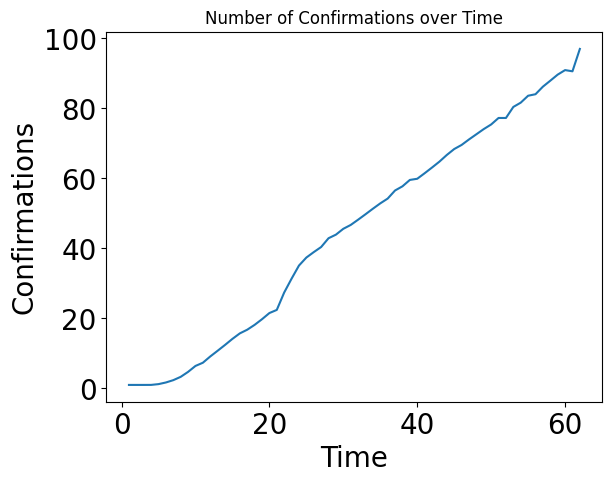

In [7]:
print(results)
df = pd.DataFrame(results)
confirmed = df[1].tolist()
times = df[0].tolist()
plt.plot(times, confirmed)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

In [8]:
df.to_csv("pc-r3-c10-a20 100")

100 tests were run and preliminary results show a difference in the early PC attachment approval rate at chain length 10.

### PC Tangle CLength = 20

In [8]:
for trial in range(1,101):
    ### Instantiating all the classes   ###
    t = Tangle(rate=5, tip_selection='mcmc', plot=True)
    ng = node_graph(t)
    w = watcher(t, ng, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng.new_node()
    ng.new_node(mal=True, watch=w)

    ### Running the simulation  ###
    attachment_flag = False

    while t.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t.time += dt_time
        if (t.time > 20) and (attachment_flag == False):
            ng.nodes[-1].issue_bad_transaction()
            PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
            w.PC_add_time = t.time
            w.update()
            ng.nodes[-1].spam_transactions(20)
            badNode = ng.nodes[-1]
            print(badNode.chain)
            attachment_flag = True
        else:
            ng.nodes[node].issue_transaction()
            w.update()
            print(t.time)

    w.output_to_sheet()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002630B772CC0>]
Edges []
Node IDS [0]
Weights [[0, 1887, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002630B772CC0>, <tangle.node object at 0x000002630AEAA0C0>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 1887, 1], [1, 1142, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002630B772CC0>, <tangle.node object at 0x000002630AEAA0C0>, <tangle.node object at 0x000002630AEA88F0>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 1887, 1], [1, 1142, 1], [2, 1683, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002630B772CC0>, <tangle.node object at 0x000002630AEAA0C0>, <tangle.node object at 0x000002630AEA88F0>, <tangle.node object at 0x000002630AF1A9C0>]
Edges [(1, 0), (2, 0), (2, 1), (3, 2), (3, 0)]
Node IDS [0, 1, 2, 3]
Weights [[0, 1887, 1], [1, 1142, 1], [2, 1683, 1], [3, 1182, 1]]
Finis

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 4, 4, 4, 5, 7, 14, 15, 15, 17, 17, 19, 19, 20, 21, 22, 22, 27, 28, 28, 29, 29, 29, 30, 31, 32, 32, 33, 34, 35, 35, 36, 36, 38, 38, 38, 40, 43, 44, 45, 45, 45, 45, 45, 45, 45, 46, 46, 50, 54, 55, 55, 55, 55, 55, 56, 56, 57, 57, 57, 60, 60, 64, 64, 64, 65, 65, 65, 65, 66, 70, 71, 71, 71, 71, 71, 73, 74, 74, 77, 78, 80, 82, 82, 84, 84, 86, 88, 89, 90, 92, 93, 94, 95, 96, 98, 100, 101, 102, 102, 102, 103, 104, 106, 106, 107, 107, 110, 112, 112, 112, 113, 114, 115, 117, 118, 119, 119, 121, 121, 122, 123, 123, 125, 128, 130, 130, 131, 131, 131, 132, 134, 135, 137, 137, 137, 137, 137, 137, 138, 139, 142, 143, 146, 146, 148, 148, 148, 148, 149, 152, 152, 152, 152, 152, 153, 155, 157, 158, 160] [1.0, 1.0090150081321934, 1.1468109174228425, 1.261738522819284, 1.3529763801685208, 1.5420805665650517, 1.67781656316946, 1.8470005344255538, 2.3593890688089525, 2.921355357429328, 3.128449331746719, 3.2074082330988793, 3.3230908565202473, 3.3243433599

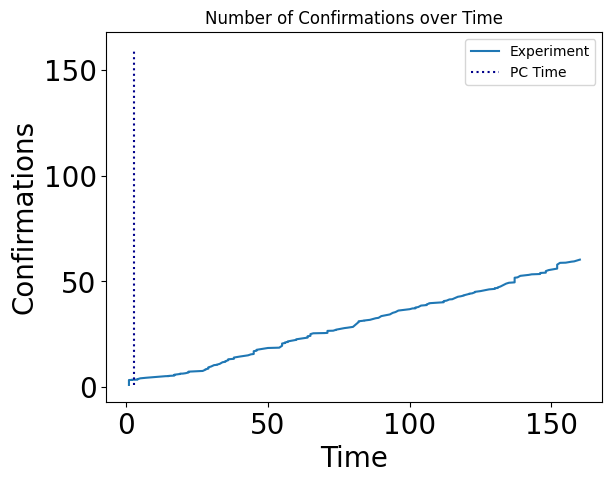

In [9]:
w.plot_confirm_over_time()
print(w.PC_add_time)

In [10]:
a = analyser()
results = a.get_res(100)

[[1, 1.0, 346], [2, 1.0021276595744681, 470], [3, 1.1767151767151767, 481], [4, 2.4202020202020202, 495], [5, 6.032608695652174, 460], [6, 10.960869565217392, 460], [7, 16.20689655172414, 348], [8, 20.626582278481013, 316], [9, 25.11969111969112, 259], [10, 27.544444444444444, 270], [11, 29.392857142857142, 252], [12, 31.480176211453745, 227], [13, 33.27467811158798, 233], [14, 35.39325842696629, 267], [15, 37.44308943089431, 246], [16, 39.62162162162162, 259], [17, 42.191570881226056, 261], [18, 44.52674897119341, 243], [19, 46.63035019455253, 257], [20, 49.19433198380567, 247], [21, 51.2007874015748, 254], [22, 53.738589211618255, 241], [23, 56.32170542635659, 258], [24, 58.76229508196721, 244], [25, 61.16475095785441, 261], [26, 63.215384615384615, 260], [27, 65.89558232931726, 249], [28, 68.4904214559387, 261], [29, 70.45703125, 256], [30, 73.03088803088804, 259], [31, 75.98148148148148, 270], [32, 78.09505703422053, 263], [33, 81.04633204633204, 259], [34, 83.38866396761134, 247],

[[1, 1.0, 346], [2, 1.0021276595744681, 470], [3, 1.1767151767151767, 481], [4, 2.4202020202020202, 495], [5, 6.032608695652174, 460], [6, 10.960869565217392, 460], [7, 16.20689655172414, 348], [8, 20.626582278481013, 316], [9, 25.11969111969112, 259], [10, 27.544444444444444, 270], [11, 29.392857142857142, 252], [12, 31.480176211453745, 227], [13, 33.27467811158798, 233], [14, 35.39325842696629, 267], [15, 37.44308943089431, 246], [16, 39.62162162162162, 259], [17, 42.191570881226056, 261], [18, 44.52674897119341, 243], [19, 46.63035019455253, 257], [20, 49.19433198380567, 247], [21, 51.2007874015748, 254], [22, 53.738589211618255, 241], [23, 56.32170542635659, 258], [24, 58.76229508196721, 244], [25, 61.16475095785441, 261], [26, 63.215384615384615, 260], [27, 65.89558232931726, 249], [28, 68.4904214559387, 261], [29, 70.45703125, 256], [30, 73.03088803088804, 259], [31, 75.98148148148148, 270], [32, 78.09505703422053, 263], [33, 81.04633204633204, 259], [34, 83.38866396761134, 247],

Text(0, 0.5, 'Confirmations')

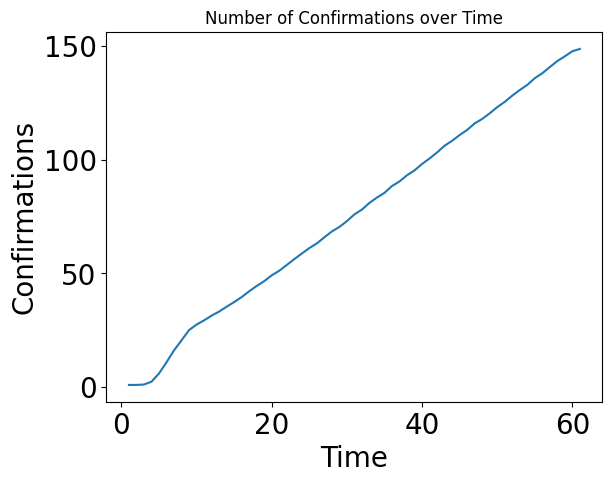

In [11]:
print(results)
df = pd.DataFrame(results)
confirmed = df[1].tolist()
times = df[0].tolist()
plt.plot(times, confirmed)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

In [12]:
df.to_csv("pc-r5-c20 100")

### Clength = 5

In [13]:
for trial in range(1,101):
    ### Instantiating all the classes   ###
    t = Tangle(rate=5, tip_selection='mcmc', plot=True)
    ng = node_graph(t)
    w = watcher(t, ng, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng.new_node()
    ng.new_node(mal=True, watch=w)

    ### Adding Transactions ###

    for j in range(2):
        for i in range(4):
            ng.nodes[i].issue_transaction()
            w.update()
    
    ### Adding the PC   ###

    ng.nodes[-1].issue_bad_transaction()
    PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
    w.PC_add_time = t.time
    w.update()
    ng.nodes[-1].spam_transactions(5)
    badNode = ng.nodes[-1]
    print(badNode.chain)

    ### Running the simulation  ###

    while t.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t.time += dt_time
        ng.nodes[node].issue_transaction()
        w.update()
        print(t.time)

    w.output_to_sheet()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002630AE7DD00>]
Edges []
Node IDS [0]
Weights [[0, 1702, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002630AE7DD00>, <tangle.node object at 0x0000026308D62660>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 1702, 1], [1, 1051, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002630AE7DD00>, <tangle.node object at 0x0000026308D62660>, <tangle.node object at 0x000002630AE7EED0>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 1702, 1], [1, 1051, 1], [2, 1700, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000002630AE7DD00>, <tangle.node object at 0x0000026308D62660>, <tangle.node object at 0x000002630AE7EED0>, <tangle.node object at 0x000002630AC670B0>]
Edges [(1, 0), (2, 0), (2, 1), (3, 1), (3, 0)]
Node IDS [0, 1, 2, 3]
Weights [[0, 1702, 1], [1, 1051, 1], [2, 1700, 1], [3, 1141, 1]]
Finis

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 5, 5, 7, 7, 8, 9, 9, 10, 13, 17, 17, 17, 17, 19, 19, 20, 20, 24, 24, 24, 25, 26, 28, 29, 29, 29, 32, 33, 34, 35, 36, 38, 38, 38, 41, 42, 42, 45, 46, 46, 46, 48, 48, 50, 50, 50, 52, 55, 55, 55, 55, 57, 58, 59, 59, 62, 63, 64, 65, 66, 68, 70, 71, 71, 72, 73, 74, 75, 76, 76, 76, 78, 78, 78, 80, 83, 84, 85, 86, 86, 86, 86, 89, 92, 94, 94, 94, 94, 94, 95, 96, 97, 97, 100, 102, 103, 103, 103, 105, 107, 107, 110, 110, 111, 111, 112, 113, 115, 116, 117, 120, 120, 120, 121, 121, 124, 125, 125, 126, 126, 127, 127, 127, 128, 128, 128, 131, 132, 133, 134, 137, 137] [1.0, 1.437532216025825, 1.6431146481142496, 1.6450206249279016, 1.6774484781664678, 1.9164223235380538, 2.067522786034612, 2.144191164055673, 2.2185936355672977, 2.3289605999467065, 2.4555046564567515, 2.4824764857992383, 2.7487439308791513, 2.7681502224730323, 2.7767930750701897, 3.465813101518869, 4.125892665064525, 4.392411952821774, 4.5052627136911685, 4.66283350060768

2.3289605999467065
[[1, 1.0, 351], [2, 1.0, 486], [3, 1.1275167785234899, 447], [4, 2.0786163522012577, 318], [5, 4.26978417266187, 278], [6, 7.130081300813008, 246], [7, 9.965367965367966, 231], [8, 12.209016393442623, 244], [9, 14.542168674698795, 249], [10, 16.87727272727273, 220], [11, 19.109375, 256], [12, 21.733333333333334, 240], [13, 24.020833333333332, 240], [14, 26.333333333333332, 249], [15, 28.426160337552744, 237], [16, 31.092741935483872, 248], [17, 33.053941908713696, 241], [18, 35.742489270386265, 233], [19, 37.8531746031746, 252], [20, 40.466911764705884, 272], [21, 43.276, 250], [22, 45.81368821292776, 263], [23, 48.29811320754717, 265], [24, 50.535714285714285, 252], [25, 53.0199203187251, 251], [26, 55.86666666666667, 240], [27, 58.03409090909091, 264], [28, 60.48708487084871, 271], [29, 63.07929515418502, 227], [30, 65.6344537815126, 238], [31, 67.5891472868217, 258], [32, 69.53125, 224], [33, 72.0546875, 256], [34, 74.44964028776978, 278], [35, 77.4980694980695, 2

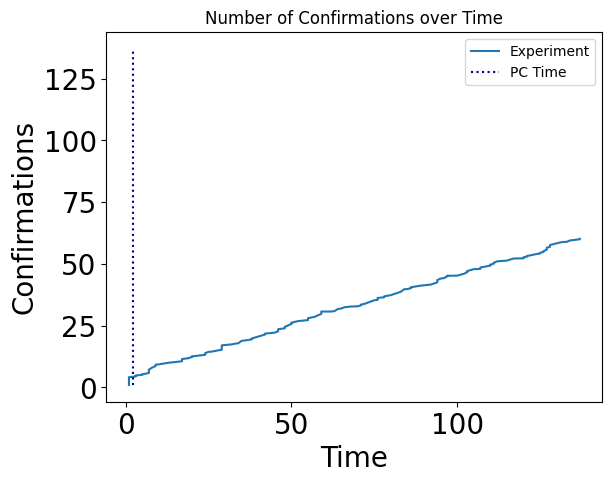

In [14]:
w.plot_confirm_over_time()
print(w.PC_add_time)
a = analyser()
results = a.get_res(100)

[[1, 1.0, 351], [2, 1.0, 486], [3, 1.1275167785234899, 447], [4, 2.0786163522012577, 318], [5, 4.26978417266187, 278], [6, 7.130081300813008, 246], [7, 9.965367965367966, 231], [8, 12.209016393442623, 244], [9, 14.542168674698795, 249], [10, 16.87727272727273, 220], [11, 19.109375, 256], [12, 21.733333333333334, 240], [13, 24.020833333333332, 240], [14, 26.333333333333332, 249], [15, 28.426160337552744, 237], [16, 31.092741935483872, 248], [17, 33.053941908713696, 241], [18, 35.742489270386265, 233], [19, 37.8531746031746, 252], [20, 40.466911764705884, 272], [21, 43.276, 250], [22, 45.81368821292776, 263], [23, 48.29811320754717, 265], [24, 50.535714285714285, 252], [25, 53.0199203187251, 251], [26, 55.86666666666667, 240], [27, 58.03409090909091, 264], [28, 60.48708487084871, 271], [29, 63.07929515418502, 227], [30, 65.6344537815126, 238], [31, 67.5891472868217, 258], [32, 69.53125, 224], [33, 72.0546875, 256], [34, 74.44964028776978, 278], [35, 77.4980694980695, 259], [36, 80.371647

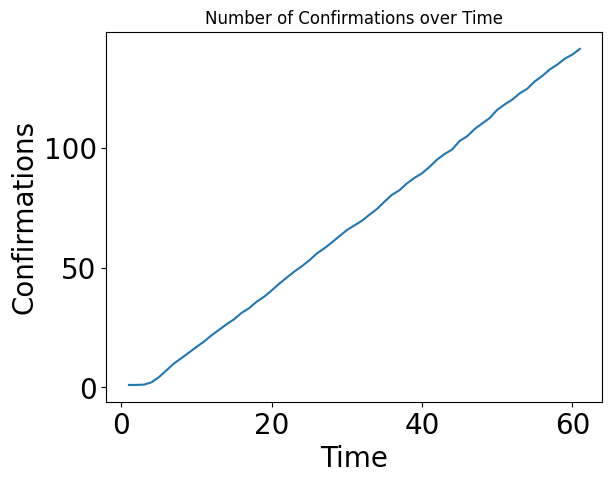

In [15]:
print(results)
df = pd.DataFrame(results)
confirmed = df[1].tolist()
times = df[0].tolist()
plt.plot(times, confirmed)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

df.to_csv("pc-r5-c5 100")